In [291]:
#importing Required Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import pi


In [48]:
#Loading data
data_raw = pd.read_csv('Data/results.csv')

In [49]:
data_raw.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [50]:
data_raw.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [51]:
data_copied = data_raw.copy()
date_temp = data_copied.date.str.partition('-')
date_temp.head()

,0,1,2
0,1872,-,11-30
1,1873,-,03-08
2,1874,-,03-07
3,1875,-,03-06
4,1876,-,03-04


In [52]:
data_copied['Year'] = date_temp[0]
data_copied.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [53]:
data_copied.tournament.unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [54]:
data_friendly = data_copied[data_copied['tournament']=='Friendly']
data_friendly.tournament.nunique()

1

In [55]:
data_wcq = data_copied[data_copied['tournament'] == 'FIFA World Cup qualification']
data_wc = data_copied[data_copied['tournament'] == 'FIFA World Cup']

In [56]:
data_wcq.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
1552,1933-06-11,Sweden,Estonia,6,2,FIFA World Cup qualification,Stockholm,Sweden,False,1933
1557,1933-06-29,Lithuania,Sweden,0,2,FIFA World Cup qualification,Kaunas,Lithuania,False,1933
1576,1933-09-24,Yugoslavia,Switzerland,2,2,FIFA World Cup qualification,Belgrade,Yugoslavia,False,1933
1583,1933-10-15,Poland,Czechoslovakia,1,2,FIFA World Cup qualification,Warsaw,Poland,False,1933
1590,1933-10-29,Switzerland,Romania,2,2,FIFA World Cup qualification,Berne,Switzerland,False,1933


In [57]:
data_wc.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930


In [58]:
#General Visualisation
dataNoneutral = data_copied[data_copied['neutral'] != True]
dataNoneutral.neutral.nunique()

1

In [59]:
dataHomewins = dataNoneutral[(dataNoneutral.home_score - dataNoneutral.away_score)>0]
dataAwaywins = dataNoneutral[(dataNoneutral.away_score - dataNoneutral.home_score)>0]


In [60]:
dataHomewins.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878


In [61]:
dataAwaywins.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877
12,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False,1879
14,1880-03-15,Wales,England,2,3,Friendly,Wrexham,Wales,False,1880
16,1881-02-26,England,Wales,0,1,Friendly,Blackburn,England,False,1881


In [62]:
cityHosting = data_copied['city'].value_counts().reset_index()
cityHosting.columns = ['city','number']
cityHosting.head()

,city,number
0,Kuala Lumpur,572
1,Bangkok,423
2,Doha,415
3,Budapest,378
4,London,377


In [357]:
def cityplot(city):
    plt.figure(figsize = (12,8))
    plt.title('Top 10 Cities Hosting Most International Matches',size = 20)
    sns.set(style = 'dark')
    sns.barplot(x = 'number',y = 'city',data = city.head(10),palette ='muted')
    plt.grid(True)
    plt.ylabel('Cities',size = 12)
    plt.xlabel('Number of Matches',size = 12)
    plt.plot()
    plt.show()

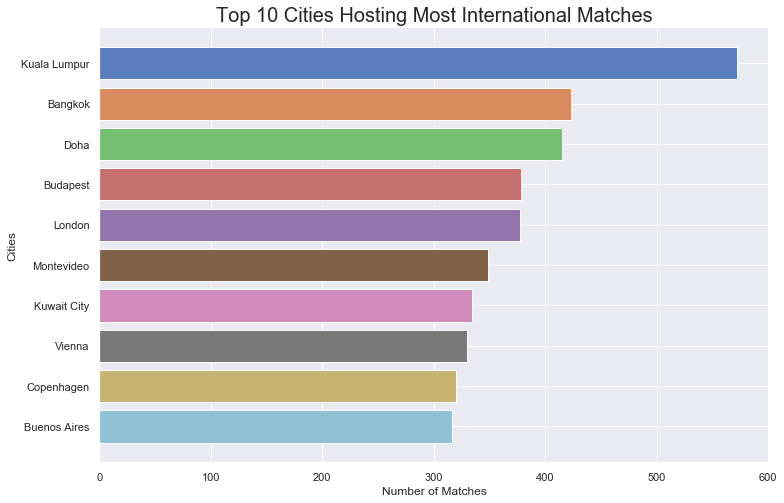

In [359]:
cityplot(cityHosting)

In [65]:
def plotWins(data,tpye,para):
    dataPlot = data[tpye].value_counts().reset_index()
    dataPlot.columns = ['Country','Wins']
    plt.figure(figsize = (12,8))
    plt.title('Top 10 Countries with Most' + para + 'Wins',size = 20)
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.barplot(x = 'Wins', y = 'Country', data = dataPlot.head(10),palette = 'deep')
    plt.xlabel('Number of ' + para + 'Wins',size = 12)
    plt.ylabel('Countries',size = 12 )
    plt.plot()
    plt.show()

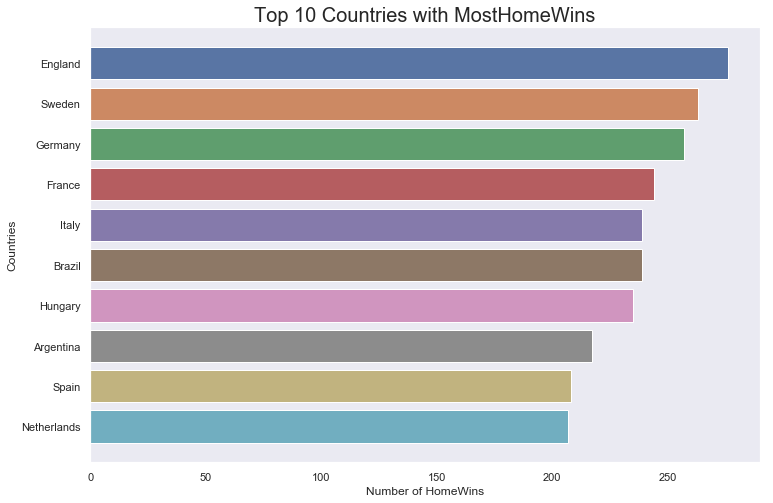

In [66]:
plotWins(dataHomewins,'home_team','Home')

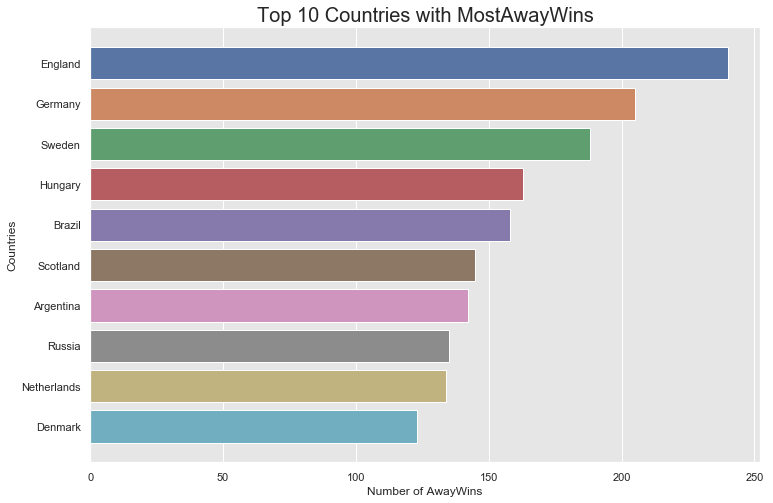

In [67]:
plotWins(dataAwaywins,'away_team','Away')

In [68]:
dataNeutral = data_copied[data_copied['neutral'] == True]
winNeutral1 = dataNeutral[dataNeutral['home_score'] > dataNeutral['away_score']].home_team.value_counts().reset_index()
winNeutral1.columns = ['Country', 'Wins1']
winNeutral2 = dataNeutral[dataNeutral['away_score'] > dataNeutral['home_score']].away_team.value_counts().reset_index()
winNeutral2.columns = ['Country','Wins2']
winNeutral = pd.merge(winNeutral1,winNeutral2,how = 'outer')


In [69]:
winNeutral = winNeutral.fillna(0)
winNeutral['Wins'] = (winNeutral['Wins1'] + winNeutral['Wins2']).astype(int)
winNeutral.head()

,Country,Wins1,Wins2,Wins
0,Brazil,156.0,57.0,213
1,Argentina,137.0,17.0,154
2,Mexico,119.0,61.0,180
3,Iraq,101.0,39.0,140
4,Burma,92.0,11.0,103


In [70]:
winHome = dataHomewins.home_team.value_counts().reset_index()
winAway = dataAwaywins.away_team.value_counts().reset_index()
winHome.columns = ['Country','Home Wins']
winAway.columns = ['Country','Away Wins']
dataDraw = data_copied[data_copied['home_score'] == data_copied['away_score']]
dataDraw.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
28,1883-03-17,Northern Ireland,Wales,1,1,Friendly,Belfast,Ireland,False,1883
36,1885-03-14,England,Wales,1,1,British Championship,Blackburn,England,False,1885
38,1885-03-21,England,Scotland,1,1,British Championship,London,England,False,1885


In [71]:
winHome.head()

,Country,Home Wins
0,England,276
1,Sweden,263
2,Germany,257
3,France,244
4,Italy,239


In [72]:
winAway.head()

,Country,Away Wins
0,England,240
1,Germany,205
2,Sweden,188
3,Hungary,163
4,Brazil,158


In [73]:
#Results = pd.DataFrame([[winHome['Home Wins'].sum()],[winAway['Away Wins'].sum()],[winNeutral['Wins'].sum()],[dataDraw.shape[0]]],index = ['Home,Away,Neutral,Draw'],columns = ['Number'])
winHomeTotal = winHome['Home Wins'].sum()
winAwayTotal = winAway['Away Wins'].sum()
winNeutralTotal = winNeutral['Wins'].sum()
draw =dataDraw.shape

Result = pd.DataFrame([[winHomeTotal],[winAwayTotal],[winNeutralTotal],[draw[0]]],index = ['Home','Away','Neutral','Draw'],columns = ['Number'])

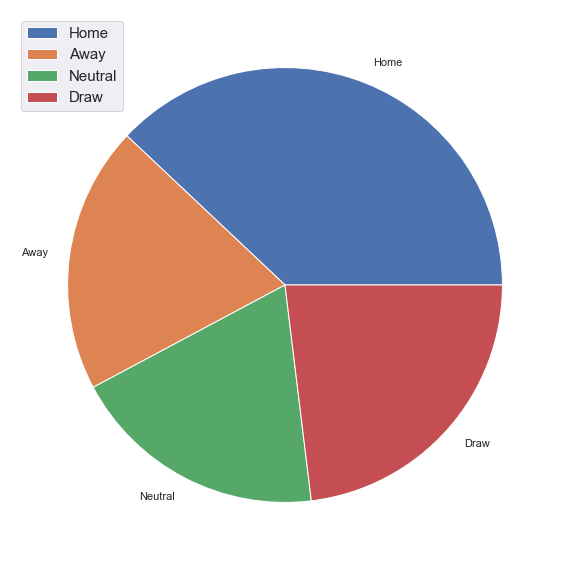

In [253]:
#Result.head()
winNeutralTotal
Result.plot.pie(y = 'Number',figsize = (10,10))
plt.legend(loc="best",prop = {"size" : 15})
plt.ylabel("")
plt.plot()
plt.show()


In [75]:
winHomeY = dataHomewins.Year.value_counts().reset_index()
winHomeY.columns = ['Year','Home Wins']
winHomeY.head()

,Year,Home Wins
0,2008,439
1,2000,414
2,2011,405
3,2001,399
4,2003,390


In [76]:
winAwayY = dataAwaywins.Year.value_counts().reset_index()
winAwayY.columns = ['Year','Away Wins']

In [77]:
winNeutral = dataNeutral.Year.value_counts().reset_index()
winNeutral.columns = ['Year', 'Neutral Wins']

In [78]:
TotalWins = winHomeY.merge(winAwayY,how = 'outer',on = 'Year')
TotalWins = TotalWins.merge(winNeutral,how = 'outer', on = 'Year')

In [79]:
TotalWins = TotalWins.sort_values('Year')
TotalWins = TotalWins.fillna(0)
TotalWins['Neutral Wins'] = TotalWins['Neutral Wins'].astype(int)
TotalWins['Away Wins'] = TotalWins['Away Wins'].astype(int)
TotalWins['Home Wins'] = TotalWins['Home Wins'].astype(int)
TotalWins = TotalWins.set_index('Year')
TotalWins.head()

,Home Wins,Away Wins,Neutral Wins
Year,,,
1873,1,0,0
1874,1,0,0
1876,2,0,0
1877,0,2,0
1878,2,0,0


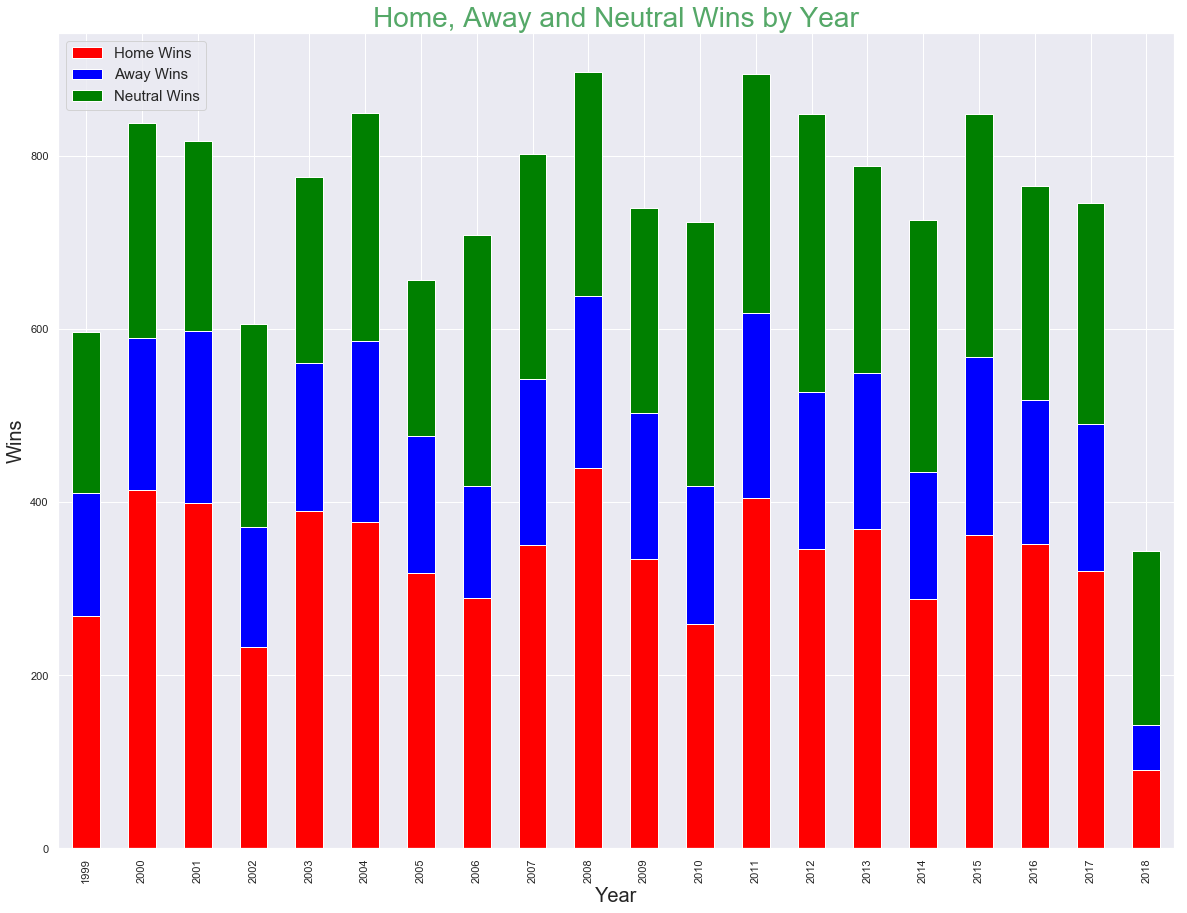

In [217]:
TotalWins[['Home Wins','Away Wins','Neutral Wins']].tail(20).plot(kind='bar',stacked = True ,figsize = (20,15),color=["red","blue","green"])
plt.title('Home, Away and Neutral Wins by Year',color = 'g',size = 28)
plt.xlabel('Year',size = 20)
plt.ylabel('Wins',size = 20)
plt.legend(loc="upper left",prop={"size":15})

In [81]:
dataGoals = dataNoneutral.groupby('Year')['home_score','away_score'].sum().reset_index()
dataGoals['total_goals'] = dataGoals['home_score'] + dataGoals['away_score']

Text(0, 0.5, 'Away Goal')

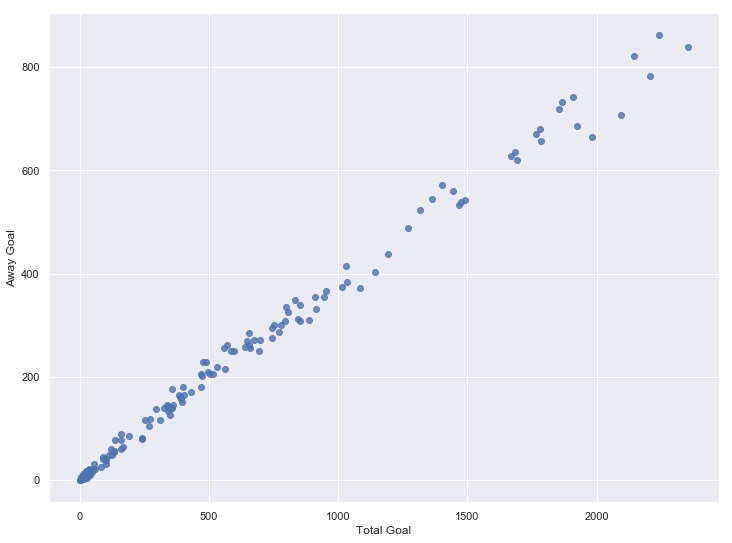

In [216]:
plt.figure(figsize = (12,9))
sns.regplot(x = dataGoals['total_goals'],y = dataGoals['away_score'],color = 'b',fit_reg = False)
plt.xlabel('Total Goal' ,size = 12)
plt.ylabel('Away Goal', size = 12)


Text(0, 0.5, 'Home Goal')

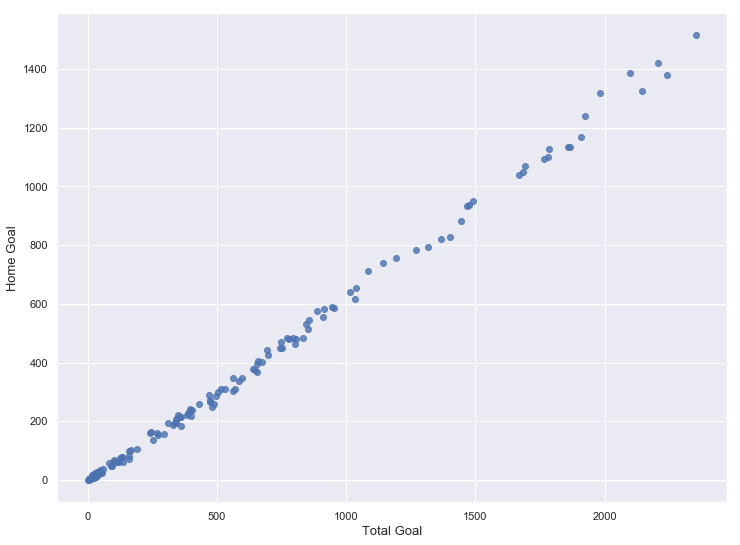

In [215]:
plt.figure(figsize = (12,9))
sns.regplot(x = dataGoals['total_goals'],y = dataGoals['home_score'],color = 'b',fit_reg = False)
plt.xlabel('Total Goal' ,size = 13)
plt.ylabel('Home Goal', size = 13)

In [86]:
winNeutral = pd.merge(winNeutral1,winNeutral2,how = 'outer')
winNeutral = winNeutral.fillna(0)
winNeutral['Wins'] = (winNeutral['Wins1'] + winNeutral['Wins2']).astype(int)
winNeutral.head()

,Country,Wins1,Wins2,Wins
0,Brazil,156.0,57.0,213
1,Argentina,137.0,17.0,154
2,Mexico,119.0,61.0,180
3,Iraq,101.0,39.0,140
4,Burma,92.0,11.0,103


In [90]:
winNeutral.drop(['Wins1','Wins2'], axis=1, inplace=True)
winNeutral.columns = ['Country','Neutral Wins']
winNeutral.head()

,Country,Neutral Wins
0,Brazil,213
1,Argentina,154
2,Mexico,180
3,Iraq,140
4,Burma,103


In [91]:
def country_wins(country,winHome,winAway,winNeutral):
    tempHome = winHome[winHome['Country'] == country]
    tempAway = winAway[winAway['Country'] == country]
    tempNeutral = winNeutral[winNeutral['Country'] == country]
    tempWins = tempHome.merge(tempAway,how = 'outer',on = 'Country')
    tempWins = tempWins.merge(tempNeutral,how = 'outer', on = 'Country')
    tempWins = tempWins.fillna(0)
    tempWins['Total_Wins'] = tempWins['Neutral Wins'] + tempWins['Away Wins'] +tempWins['Home Wins']
    return tempWins

In [97]:
GermanyWins = country_wins('Germany',winHome,winAway,winNeutral)
EnglandWins = country_wins('England',winHome,winAway,winNeutral)
FranceWins = country_wins('France',winHome,winAway,winNeutral)
BrazilWins = country_wins('Brazil',winHome,winAway,winNeutral)

In [98]:
GermanyWins.head()

,Country,Home Wins,Away Wins,Neutral Wins,Total_Wins
0,Germany,257,205,84,546


In [99]:
EnglandWins.head()

,Country,Home Wins,Away Wins,Neutral Wins,Total_Wins
0,England,276,240,41,557


In [100]:
BrazilWins.head()

,Country,Home Wins,Away Wins,Neutral Wins,Total_Wins
0,Brazil,239,158,213,610


In [102]:
FranceWins.head()

,Country,Home Wins,Away Wins,Neutral Wins,Total_Wins
0,France,244,114,45,403


In [103]:
data_wc.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930


In [183]:
dataWcht = data_wc.groupby('home_team')['home_score'].sum().reset_index().sort_values('home_score')
dataWcht.columns = ['Country','Goal1']
dataWcat = data_wc.groupby('away_team')['away_score'].sum().reset_index().sort_values('away_score')
dataWcat.columns = ['Country', 'Goal2']
dataWcGoals = dataWcat.merge(dataWcht,on = 'Country',how = 'outer')
dataWcGoals = dataWcGoals.fillna(0)
dataWcGoals['Total Goals'] = (dataWcGoals['Goal1'] + dataWcGoals['Goal2']).astype(int)
dataWcGoals = dataWcGoals.sort_values('Total Goals',ascending = False)
dataWcGoals.head()

,Country,Goal2,Goal1,Total Goals
75,Brazil,52.0,177.0,229
78,Germany,68.0,158.0,226
60,Argentina,23.0,114.0,137
76,Italy,56.0,72.0,128
67,France,35.0,81.0,116


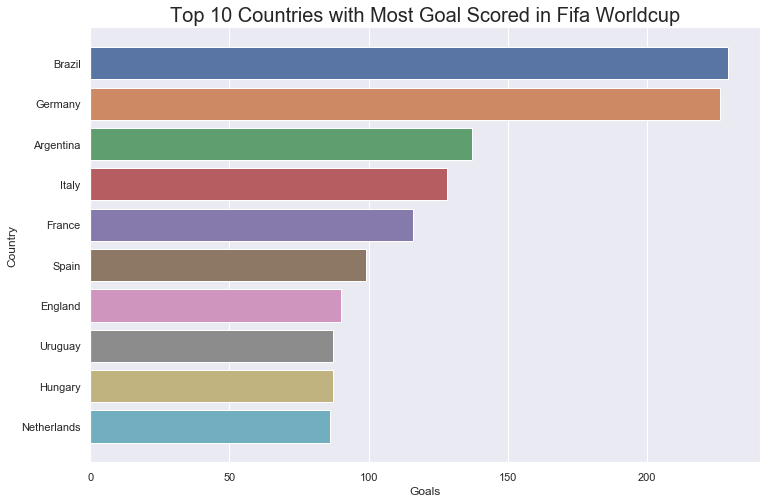

In [184]:
plt.figure(figsize = (12,8))
sns.set(style = 'darkgrid')
sns.barplot(x = 'Total Goals', y = 'Country', data = dataWcGoals.head(10),palette = 'deep')
plt.xlabel('Goals', size = 12)
plt.ylabel('Country',size = 12)
plt.title('Top 10 Countries with Most Goal Scored in Fifa Worldcup',size = 20)
plt.plot()
plt.show()

In [270]:
countryFourWins = pd.concat([GermanyWins,BrazilWins,FranceWins,EnglandWins])
countryFourWins.head()

,Country,Home Wins,Away Wins,Neutral Wins,Total_Wins
0,Germany,257,205,84,546
0,Brazil,239,158,213,610
0,France,244,114,45,403
0,England,276,240,41,557


In [271]:
winwc1 = data_wc[data_wc['home_score']>data_wc['away_score']]
winwc2 = data_wc[data_wc['home_score'] < data_wc['away_score']]



In [187]:
'''winwc1 = winwc1.home_score.value_counts().reset_index()
winwc1.columns = ['Goal Scored','Numbers1']
winwc2 = winwc2.away_score.value_counts().reset_index()
winwc2.columns = ['Goal Scored','Numbers2']
winwc1 = winwc1.sort_values('Goal Scored')
winwc2 = winwc2.sort_values('Goal Scored')'''


"winwc1 = winwc1.home_score.value_counts().reset_index()\nwinwc1.columns = ['Goal Scored','Numbers1']\nwinwc2 = winwc2.away_score.value_counts().reset_index()\nwinwc2.columns = ['Goal Scored','Numbers2']\nwinwc1 = winwc1.sort_values('Goal Scored')\nwinwc2 = winwc2.sort_values('Goal Scored')"

In [192]:
winwcT1 = winwc1['home_score'].reset_index()
winwcT1.columns = ['index','win goal']
winwcT2 = winwc2['away_score'].reset_index()
winwcT2.columns = ['index','win goal']
winwcT = pd.concat([winwcT1,winwcT2])
winwcT.head()

,index,win goal
0,1278,4
1,1281,1
2,1282,3
3,1286,1
4,1287,6


Text(0.5, 1.0, 'Distribution of Win Goals in Worldcup')

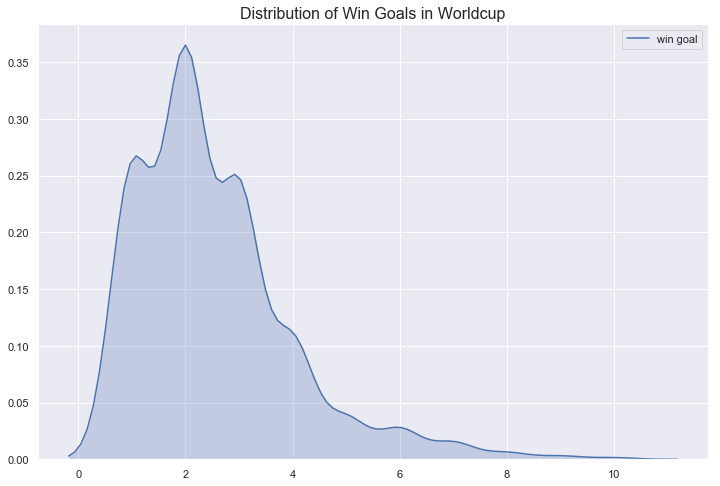

In [213]:
plt.figure(figsize = (12,8))
sns.kdeplot(winwcT['win goal'] , shade=True)
plt.title('Distribution of Win Goals in Worldcup',size = 16)
plt.legend()

In [153]:
winwc2.head()

,Goal Scored,Numbers2
1,1,78
0,2,91
2,3,74
3,4,25
4,5,11


In [166]:
winwcG = winwc1.merge(winwc2,on = 'Goal Scored',how = 'outer')
winwcG.head()

,Goal Scored,Numbers1,Numbers2
0,1,94,78.0
1,2,147,91.0
2,3,85,74.0
3,4,45,25.0
4,5,13,11.0


In [155]:
winwcG.isnull().any()

Goal Scored    False
Numbers1       False
Numbers2        True
dtype: bool

In [259]:
winwcG = winwcG.fillna(0)
winwcG.head()

,Goal Scored,Numbers1,Numbers2
0,1,94,78.0
1,2,147,91.0
2,3,85,74.0
3,4,45,25.0
4,5,13,11.0


In [260]:
winwcG['Total Number'] = (winwcG['Numbers1'] + winwcG['Numbers2']).astype(int)
winwcG.drop(['Numbers1','Numbers2'],axis = 1,inplace=True)


In [261]:
winwcG.head()


,Goal Scored,Total Number
0,1,172
1,2,238
2,3,159
3,4,70
4,5,24


In [263]:
winwcG.sum()

Goal Scored      55
Total Number    698
dtype: int64

In [218]:
dataHomewins['GD Home'] = dataHomewins['home_score'] - dataHomewins['away_score']
dataAwaywins['GD Away'] = dataAwaywins['away_score'] - dataAwaywins['home_score']

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [219]:
dataHomewins.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,GD Home
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,4
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,5


In [220]:
dataAwaywins.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,GD Away
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,2
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,2
12,1879-04-07,Wales,Scotland,0,3,Friendly,Wrexham,Wales,False,1879,3
14,1880-03-15,Wales,England,2,3,Friendly,Wrexham,Wales,False,1880,1
16,1881-02-26,England,Wales,0,1,Friendly,Blackburn,England,False,1881,1


In [208]:
dataNeutral.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
68,1890-02-08,Wales,Northern Ireland,5,2,British Championship,Shrewsbury,England,True,1890
262,1910-05-29,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,1910
325,1912-07-03,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,1912
420,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916
423,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916


In [221]:
dataNeu1 = dataNeutral[dataNeutral['home_score'] > dataNeutral['away_score']]
dataNeu2 = dataNeutral[dataNeutral['home_score'] < dataNeutral['away_score']]
dataNeu1['GD Neutral'] = dataNeu1['home_score'] - dataNeu1['away_score']
dataNeu2['GD Neutral'] = dataNeu2['away_score'] - dataNeu2['home_score']
dataNeuwins = pd.concat([dataNeu1,dataNeu2])
dataNeuwins.head()

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year,GD Neutral
68,1890-02-08,Wales,Northern Ireland,5,2,British Championship,Shrewsbury,England,True,1890,3
325,1912-07-03,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,1912,1
454,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,1917,2
455,1917-10-06,Argentina,Chile,1,0,Copa América,Montevideo,Uruguay,True,1917,1
459,1917-10-12,Brazil,Chile,5,0,Copa América,Montevideo,Uruguay,True,1917,5


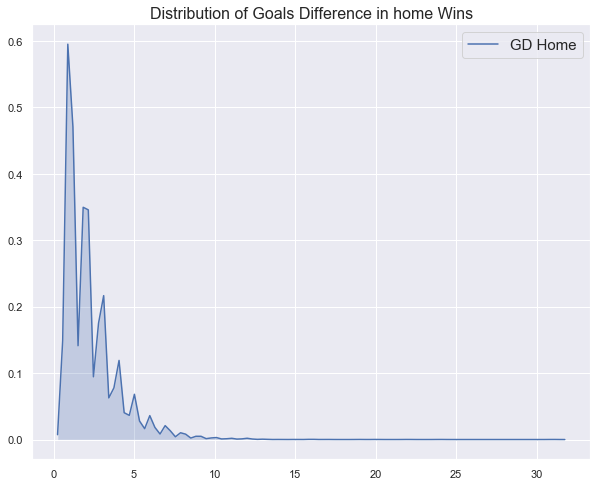

In [241]:
plt.figure(figsize = (10,8))
#sns.kdeplot(dataAwaywins['GD Away'] , shade=True)
sns.kdeplot(dataHomewins['GD Home'] , shade=True)
#sns.kdeplot(dataNeuwins['GD Neutral'] , shade=True)
plt.title('Distribution of Goals Difference in home Wins',size = 16)
plt.legend(loc="best",prop = {"size" : 15})
plt.plot()
plt.show()


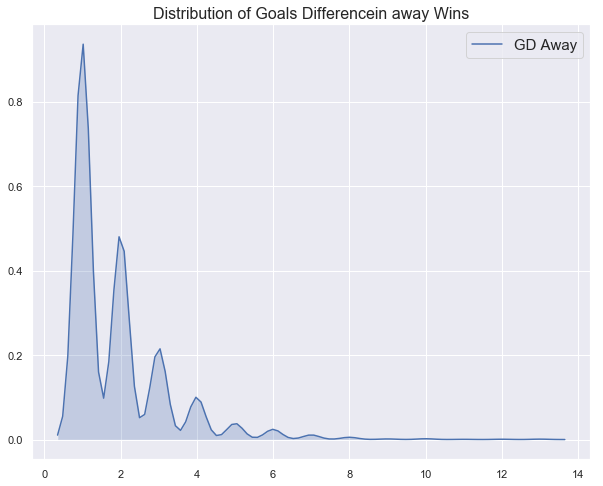

In [246]:
plt.figure(figsize = (10,8))
sns.kdeplot(dataAwaywins['GD Away'] , shade=True)
#sns.kdeplot(dataHomewins['GD Home'] , shade=True)
#sns.kdeplot(dataNeuwins['GD Neutral'] , shade=True)
plt.legend(loc="best",prop = {"size" : 12})
plt.title('Distribution of Goals Differencein away Wins',size = 16)
plt.legend(loc="best",prop = {"size" : 15})
plt.plot()
plt.show()


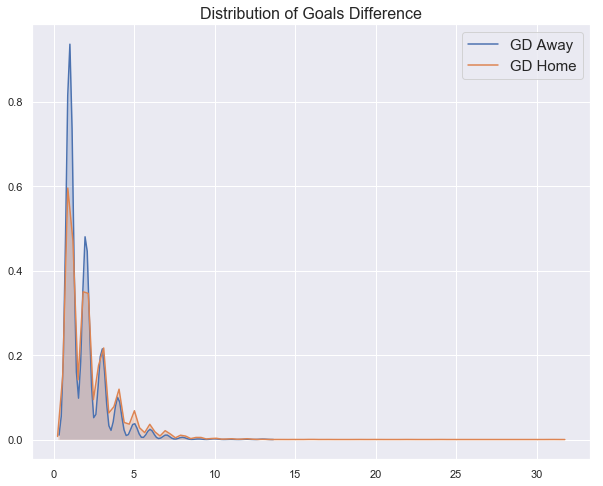

In [254]:
plt.figure(figsize = (10,8))
sns.kdeplot(dataAwaywins['GD Away'] , shade=True)
sns.kdeplot(dataHomewins['GD Home'] , shade=True)
#sns.kdeplot(dataNeuwins['GD Neutral'] , shade=True)
plt.title('Distribution of Goals Difference',size = 16)
plt.legend(loc="best",prop = {"size" : 15})
plt.plot()
plt.show()


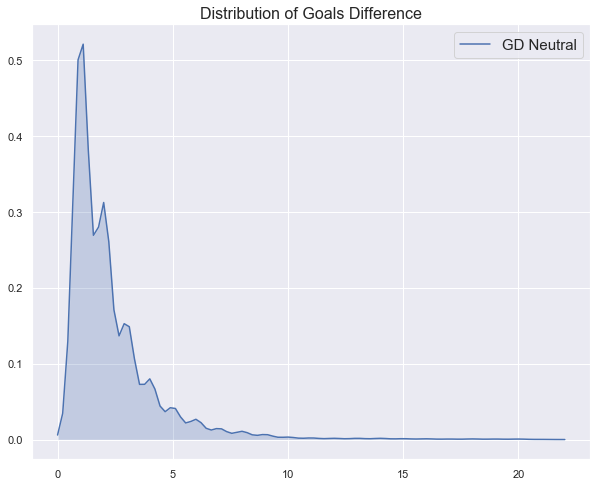

In [255]:
plt.figure(figsize = (10,8))
#sns.kdeplot(dataAwaywins['GD Away'] , shade=True)
#sns.kdeplot(dataHomewins['GD Home'] , shade=True)
sns.kdeplot(dataNeuwins['GD Neutral'] , shade=True)
plt.title('Distribution of Goals Difference',size = 16)
plt.legend(loc="best",prop = {"size" : 15})
plt.plot()
plt.show()

In [298]:
countryFourWins.head()

,Country,Home Wins,Away Wins,Neutral Wins,Total_Wins
0,Germany,257,205,84,546
0,Brazil,239,158,213,610
0,France,244,114,45,403
0,England,276,240,41,557


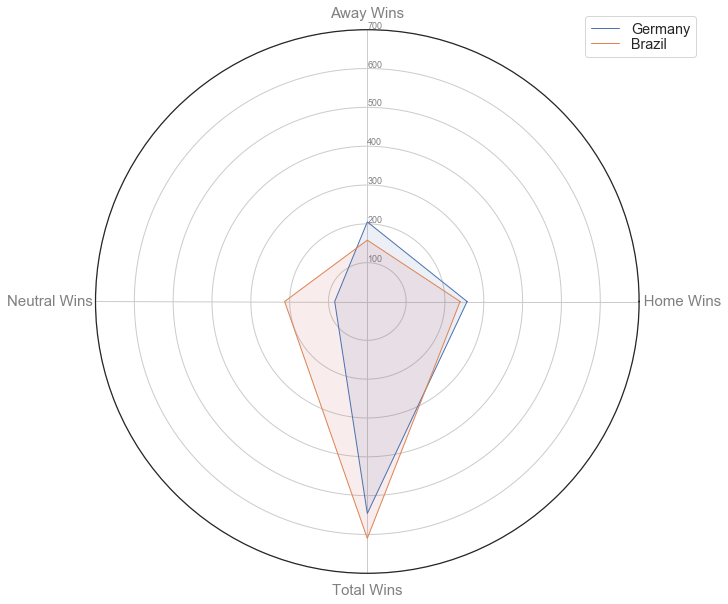

In [362]:
#Germany and Brazil
plt.figure(figsize = (10,10))

categories=list(countryFourWins)[1:]
N = len(categories)

values=countryFourWins.iloc[0].drop('Country').values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], labels=['             Home Wins', 'Away Wins', 'Neutral Wins              ', 'Total Wins'], color='grey', size=15)
ax.set_rlabel_position(90)


values1=countryFourWins.iloc[1].drop('Country').values.flatten().tolist()
values1 += values1[:1]

angles1 = [n / float(N) * 2 * pi for n in range(N)]
angles1 += angles1[:1]


plt.yticks([100,200,300,400,500,600,700], ['100','200','300','400','500','600','700'], color="grey", size=9)
plt.ylim(0,700)


ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.plot(angles1, values1, linewidth=1, linestyle='solid')
 
ax.fill(angles, values, 'b', alpha=0.1)
ax.fill(angles1, values1, 'r', alpha=0.1)

ax.legend(['Germany','Brazil'], loc=(0.9, .95),
labelspacing=0.1, fontsize='large')

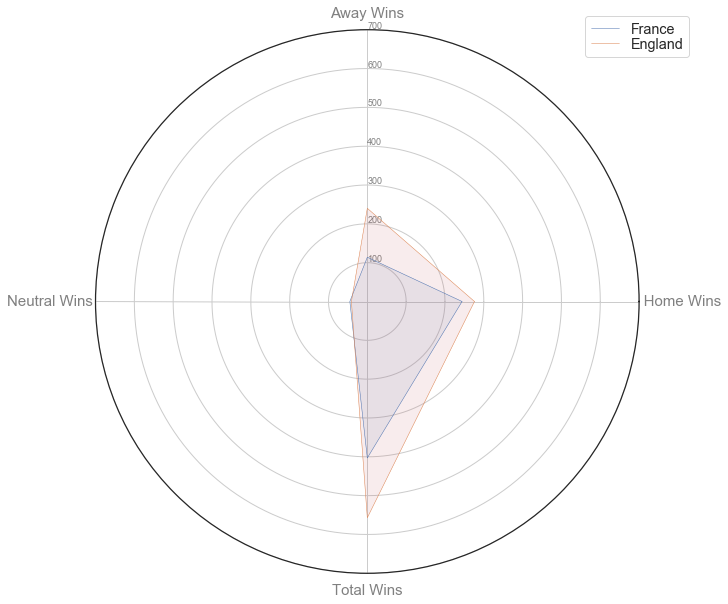

In [361]:
plt.figure(figsize = (10,10))

categories=list(countryFourWins)[1:]
N = len(categories)
sns.set(style = 'white')

values=countryFourWins.iloc[2].drop('Country').values.flatten().tolist()
values += values[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], labels=['             Home Wins', 'Away Wins', 'Neutral Wins              ', 'Total Wins'], color='grey', size=15)
ax.set_rlabel_position(90)
values1=countryFourWins.iloc[3].drop('Country').values.flatten().tolist()
values1 += values1[:1]

angles1 = [n / float(N) * 2 * pi for n in range(N)]
angles1 += angles1[:1]


plt.yticks([100,200,300,400,500,600,700], ['100','200','300','400','500','600','700'], color="grey", size=9)
plt.ylim(0,700)

ax.plot(angles, values, linewidth=0.5, linestyle='solid')
ax.plot(angles1, values1, linewidth=0.5, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)
ax.fill(angles1, values1, 'r', alpha=0.1)
ax.legend(['France','England'], loc=(0.9, .95),
labelspacing=0.1, fontsize='large')


In [363]:
data_copied.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [398]:
brazilT1 = data_wc[data_wc['home_team'] == 'Brazil']
brazilT2 = data_wc[data_wc['away_team'] == 'Brazil']
brazilT1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1652,1934-05-27,Brazil,Spain,1,3,FIFA World Cup,Genoa,Italy,True,1934
2050,1938-06-05,Brazil,Poland,6,5,FIFA World Cup,Strasbourg,France,True,1938
2060,1938-06-12,Brazil,Czechoslovakia,1,1,FIFA World Cup,Bordeaux,France,True,1938
2064,1938-06-14,Brazil,Czechoslovakia,2,1,FIFA World Cup,Bordeaux,France,True,1938


In [399]:
brazilT2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Year
1290,1930-07-20,Bolivia,Brazil,0,4,FIFA World Cup,Montevideo,Uruguay,True,1930
4296,1958-06-08,Austria,Brazil,0,3,FIFA World Cup,Uddevalla,Sweden,True,1958
4332,1958-06-29,Sweden,Brazil,2,5,FIFA World Cup,Solna,Sweden,False,1958
5095,1962-06-13,Chile,Brazil,2,4,FIFA World Cup,Santiago,Chile,False,1962
8950,1974-06-18,Scotland,Brazil,0,0,FIFA World Cup,Frankfurt am Main,Germany,True,1974


In [400]:
brazilT1 = brazilT1.groupby('Year')['home_score'].sum().reset_index()
brazilT = brazilT2.groupby('Year')['away_score'].sum().reset_index()
brazilT.head()

,Year,away_score
0,1930,4
1,1958,8
2,1962,4
3,1974,5
4,1978,1


In [401]:
brazilT = brazilT.merge(brazilT1,on = 'Year',how = 'outer')
brazilT.isnull().sum()

Year          0
away_score    8
home_score    0
dtype: int64

In [402]:
brazilT = brazilT.fillna(0)
brazilT.isnull().sum()

Year          0
away_score    0
home_score    0
dtype: int64

In [407]:
brazilT1 = data_wc[data_wc['home_team'] == 'Brazil']
brazilT2 = data_wc[data_wc['away_team'] == 'Brazil']
brazilY1 = brazilT1['Year'].value_counts().reset_index()
brazilY1.columns = ['Year','Matches1']
brazilY2 = brazilT2['Year'].value_counts().reset_index()
brazilY2.columns = ['Year','Matches2']
brazilY = brazilY1.merge(brazilY2,on = 'Year',how = 'outer')
brazilY.isnull().sum()


Year        0
Matches1    0
Matches2    8
dtype: int64

In [412]:
brazilY = brazilY.fillna(0)
brazilY['Matches2'] = brazilY['Matches2'].astype(int)
brazilY['Matches'] = brazilY['Matches1'] + brazilY['Matches2']
brazilY.head()

,Year,Matches1,Matches2,Matches
0,2014,7,0,7
1,1950,6,0,6
2,1998,6,1,7
3,1970,6,0,6
4,1938,5,0,5


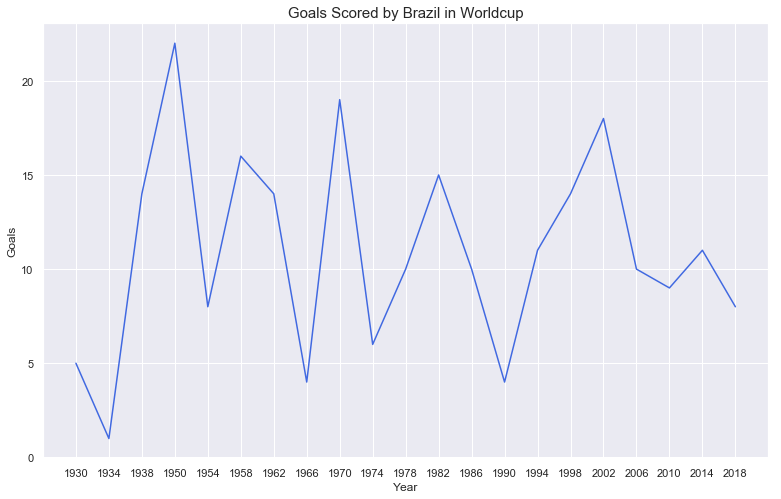

In [420]:
brazilT['Goals'] = brazilT['home_score'] + brazilT['away_score']
plt.figure(figsize=(13,8))
plt.title('Goals Scored by Brazil in Worldcup',size = 15)
sns.set(style = 'dark')
sns.lineplot('Year','Goals',data = brazilT, color = 'royalblue')
plt.grid(True)
plt.show()

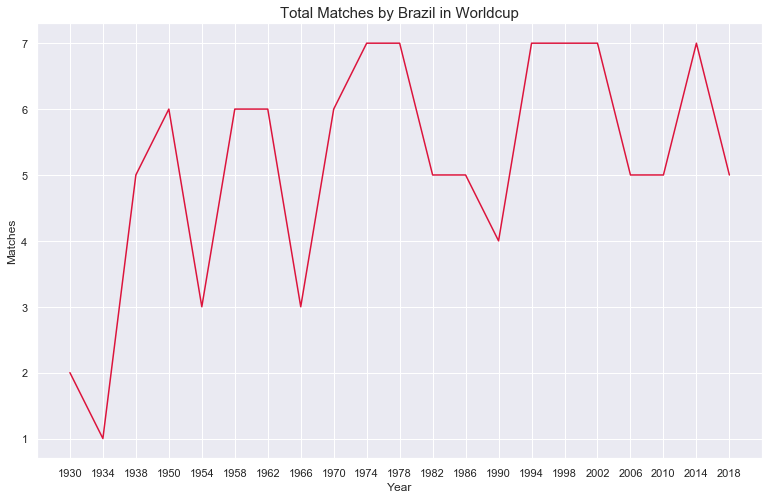

In [422]:
plt.figure(figsize=(13,8))
plt.title('Total Matches by Brazil in Worldcup',size = 15)
sns.set(style = 'dark')
sns.lineplot('Year','Matches',data = brazilY, color = 'crimson')
plt.grid(True)
plt.show()